In [2]:
from pyFTS.data import NASDAQ, SP500

In [15]:
datasets = {
    "SP500": SP500.get_data()[11500:16000],
    "NASDAQ": NASDAQ.get_data()
}

In [25]:
train_split = 3000

In [5]:
from pyFTS.common import Transformations
tdiff = Transformations.Differential(1)

SP500
NASDAQ


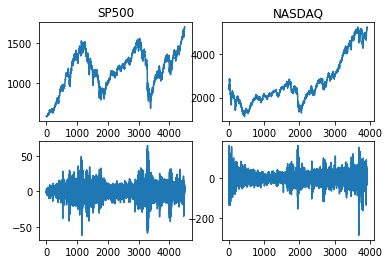

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2)
for count, (dataset_name, dataset) in enumerate(datasets.items()):
    print(dataset_name)
    dataset_diff = tdiff.apply(dataset)
    ax[0][count].plot(dataset)
    ax[1][count].plot(dataset_diff)
    ax[0][count].set_title(dataset_name)

In [26]:
from pyFTS.models import song
from pyFTS.partitioners import Grid

models = {}
for count, (dataset_name, dataset) in enumerate(datasets.items()):
    partitioner_diff = Grid.GridPartitioner(data=dataset, npart=15, tranformation=tdiff)
    model = song.ConventionalFTS(partitioner=partitioner_diff)
    model.name = dataset_name
    model.append_transformation(tdiff)
    model.fit(dataset[:train_split], order=1)
    models[dataset_name]=model

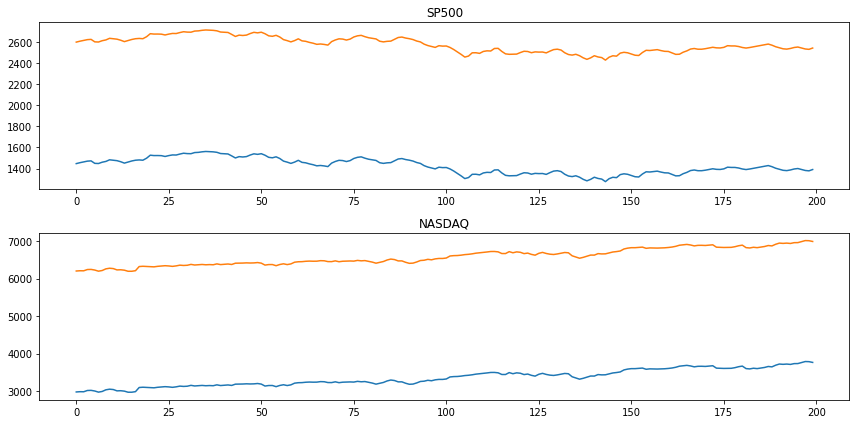

In [27]:
_, ax = plt.subplots(nrows=2, ncols=1, figsize=[12, 6])

for count, (dataset_name, dataset) in enumerate(datasets.items()):
    ax[count].plot(dataset[train_split:train_split+200])
    model = models[dataset_name]
    forecasts = model.predict(dataset[train_split:train_split+200], steps_ahead=1)
    ax[count].plot(forecasts)
    ax[count].set_title(dataset_name)
    
plt.tight_layout()

In [31]:
from pyFTS.benchmarks import Measures
import pandas as pd
rows = []

for count, (dataset_name, dataset) in enumerate(datasets.items()):
    row = [dataset_name]
    test = dataset[train_split:train_split+200]
    model = models[dataset_name]
    row.extend(Measures.get_point_statistics(test, model))
    rows.append(row)
    
pd.DataFrame(rows, columns=["Dataset", "RMSE", "MAPE", "Theil's U"]).set_index("Dataset")

,RMSE,MAPE,Theil's U
Dataset,,,
SP500,1153.3,81.20,94.08
NASDAQ,3218.7,96.29,139.43
